In [69]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#File Location
csvfile = "Output/Resources/wine_data.csv"
#Read csv file and store in Pandas dataframe, preview head (skipfirst colmn)
wine_data_raw = pd.read_csv(csvfile,usecols=range(1,14))
wine_data_raw.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [71]:
wine_data_raw.count()

country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [72]:
# Consolidating to a smaller DataFrame
wine_data_df = pd.DataFrame({"Country" : wine_data_raw["country"], "Region" : wine_data_raw["province"], 
                             "Price_per_Bottle" : wine_data_raw["price"], "Wineries" : wine_data_raw["winery"]})

wine_data_df.head()

,Country,Region,Price_per_Bottle,Wineries
0,Portugal,Douro,15.0,Quinta dos Avidagos
1,US,Oregon,14.0,Rainstorm
2,US,Michigan,13.0,St. Julian
3,US,Oregon,65.0,Sweet Cheeks
4,Spain,Northern Spain,15.0,Tandem


In [73]:
basic_country_count = wine_data_df["Country"].nunique()
basic_country_count

42

In [74]:
# Grouping countries into Other with less than 1000 wines per country
ratings = []
for country in wine_data_df["Country"]:
    if country == "US":
        ratings.append("US")
    elif country == "France":
        ratings.append("France")
    elif country == "Italy":
        ratings.append("Italy")
    elif country == "Spain":
        ratings.append("Spain")
    elif country == "Portugal":
        ratings.append("Portugal") 
    elif country == "Chile":
        ratings.append("Chile") 
    elif country == "Argentina":
        ratings.append("Argentina") 
    elif country == "Austria":
        ratings.append("Austria") 
    elif country == "Australia":
        ratings.append("Australia") 
    elif country == "Germany":
        ratings.append("Germany") 
    elif country == "New Zealand":
        ratings.append("New Zealand") 
    elif country == "South Africa":
        ratings.append("South Africa") 
    else:
         ratings.append("Other")

# Adding new column    
wine_data_df["New Country"] = ratings
wine_data_df        

,Country,Region,Price_per_Bottle,Wineries,New Country
0,Portugal,Douro,15.0,Quinta dos Avidagos,Portugal
1,US,Oregon,14.0,Rainstorm,US
2,US,Michigan,13.0,St. Julian,US
3,US,Oregon,65.0,Sweet Cheeks,US
4,Spain,Northern Spain,15.0,Tandem,Spain
5,Italy,Sicily & Sardinia,16.0,Terre di Giurfo,Italy
6,France,Alsace,24.0,Trimbach,France
7,Germany,Rheinhessen,12.0,Heinz Eifel,Germany
8,France,Alsace,27.0,Jean-Baptiste Adam,France
9,US,California,19.0,Kirkland Signature,US


In [75]:
# Grouping by New Country and calculating based on New Country
wine_data_country = wine_data_df.groupby("New Country")
wine_data_country_count = wine_data_country["New Country"].count()
wine_data_country_wineries_count = wine_data_country["Wineries"].nunique()
wine_data_country_region_count = wine_data_country["Region"].nunique()
wine_data_country_mean = wine_data_country["Price_per_Bottle"].mean()
wine_data_country_high = wine_data_country["Price_per_Bottle"].max()
wine_data_country_low = wine_data_country["Price_per_Bottle"].min()
Wines_per_Winery = wine_data_country_count / wine_data_country_wineries_count
    

In [76]:
# Creating Dataframe by New Country
wine_data_country_df = pd.DataFrame({ "# of Wines per Country" : wine_data_country_count, "# of Wineries per Country" : wine_data_country_wineries_count,
                                     "Wines per Winery": Wines_per_Winery, "# of Regions per Country" : wine_data_country_region_count,
                                     "Average Price" : wine_data_country_mean, "Highest Price" : wine_data_country_high,
                                    "Lowest Price" : wine_data_country_low})
wine_data_country_df_sort = wine_data_country_df.sort_values(["# of Wines per Country"], ascending=False)
wine_data_country_df_sort 


,# of Wines per Country,# of Wineries per Country,Wines per Winery,# of Regions per Country,Average Price,Highest Price,Lowest Price
New Country,,,,,,,
US,54265,5368,10.108979,27,36.573464,2013.0,4.0
France,17776,3400,5.228235,11,41.139120,3300.0,5.0
Italy,16914,2629,6.433625,10,39.663770,900.0,5.0
Spain,6573,1428,4.602941,8,28.215275,770.0,4.0
Portugal,4875,382,12.761780,40,26.218256,1000.0,5.0
Chile,4416,314,14.063694,43,20.786458,400.0,5.0
Argentina,3756,528,7.113636,2,24.510117,230.0,4.0
Austria,2799,211,13.265403,25,30.762772,1100.0,7.0
Other,2516,502,5.011952,178,27.084658,764.0,4.0


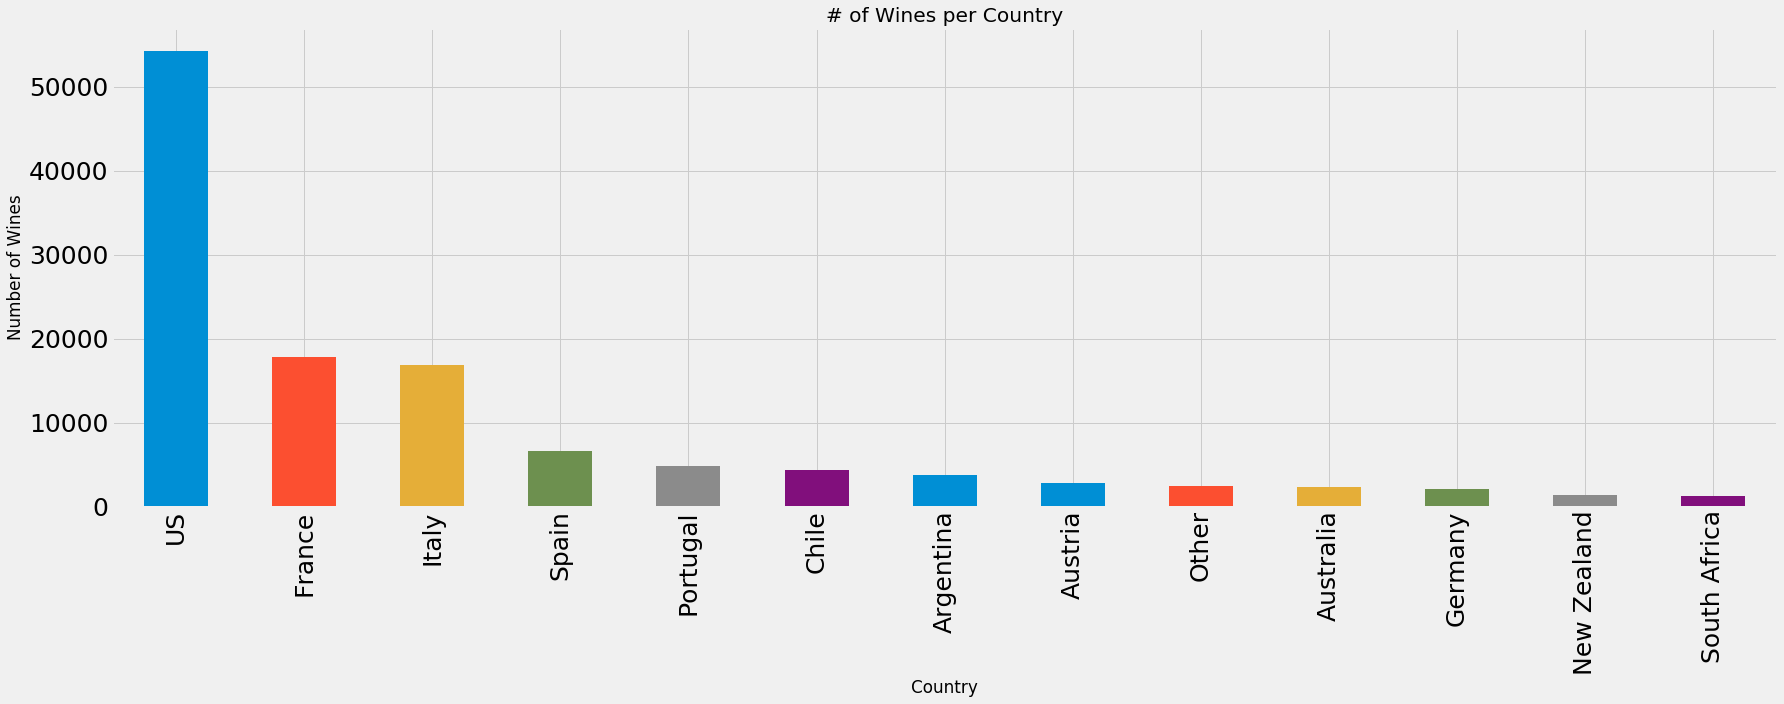

In [77]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar Chart based on # of Wines per Country
wine_data_country_df_sort["# of Wines per Country"].plot(kind="bar", grid = True, fontsize = 25, figsize=(25,10))
plt.title("# of Wines per Country")
plt.ylabel("Number of Wines")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("Output/#ofWinesperCountry.png")
plt.show()

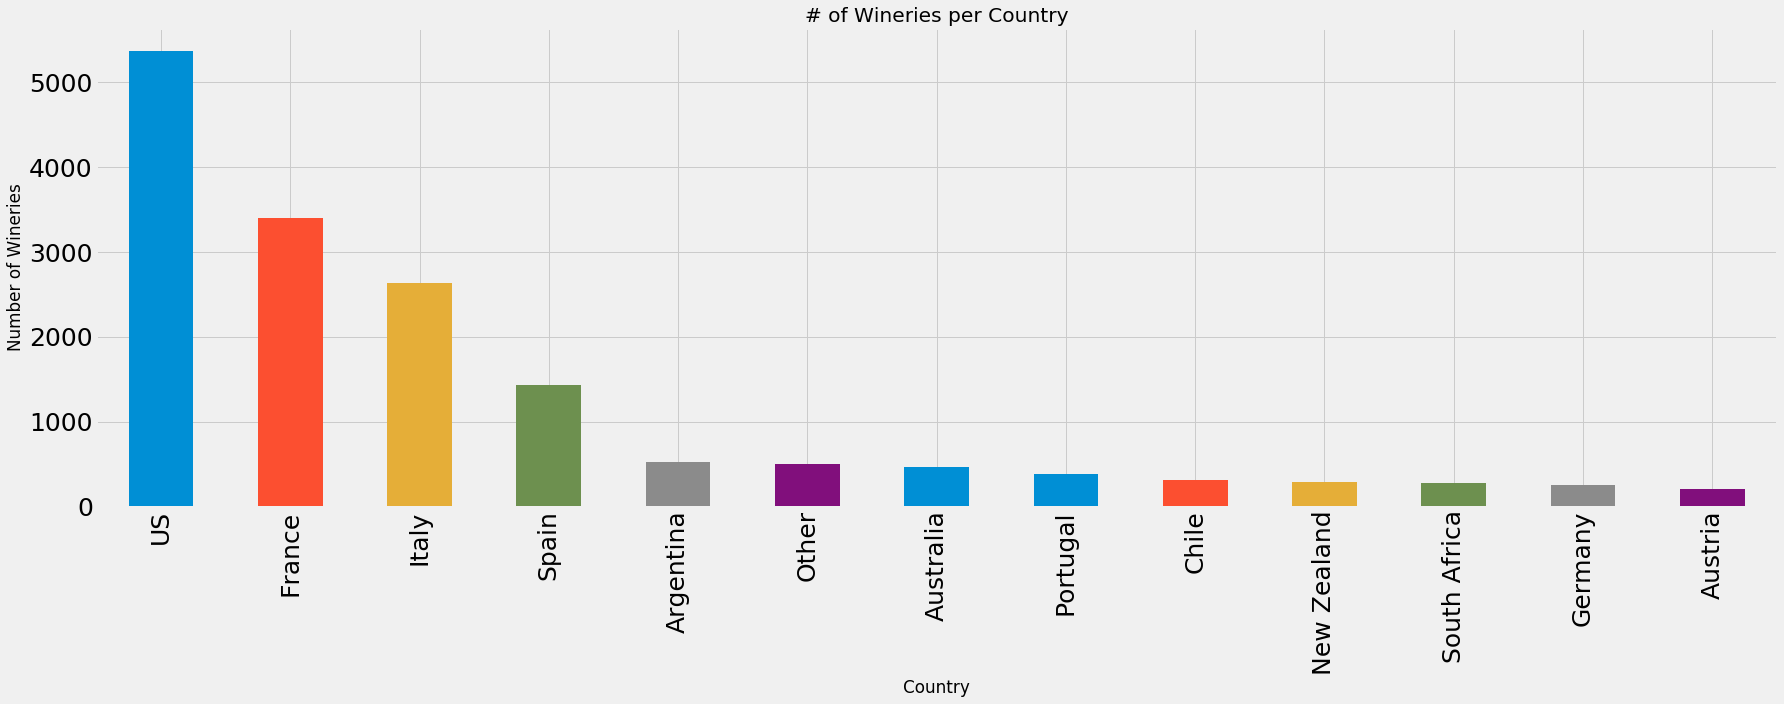

In [78]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar Chart based on # of Wineries per Country
wine_data_country_wineries_df_sort = wine_data_country_df.sort_values(["# of Wineries per Country"], ascending=False)
wine_data_country_wineries_df_sort["# of Wineries per Country"].plot(kind="bar", grid = True, fontsize = 25, figsize=(25,10))
plt.title("# of Wineries per Country")
plt.ylabel("Number of Wineries")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("Output/#ofWineriesperCountry.png")
plt.show()

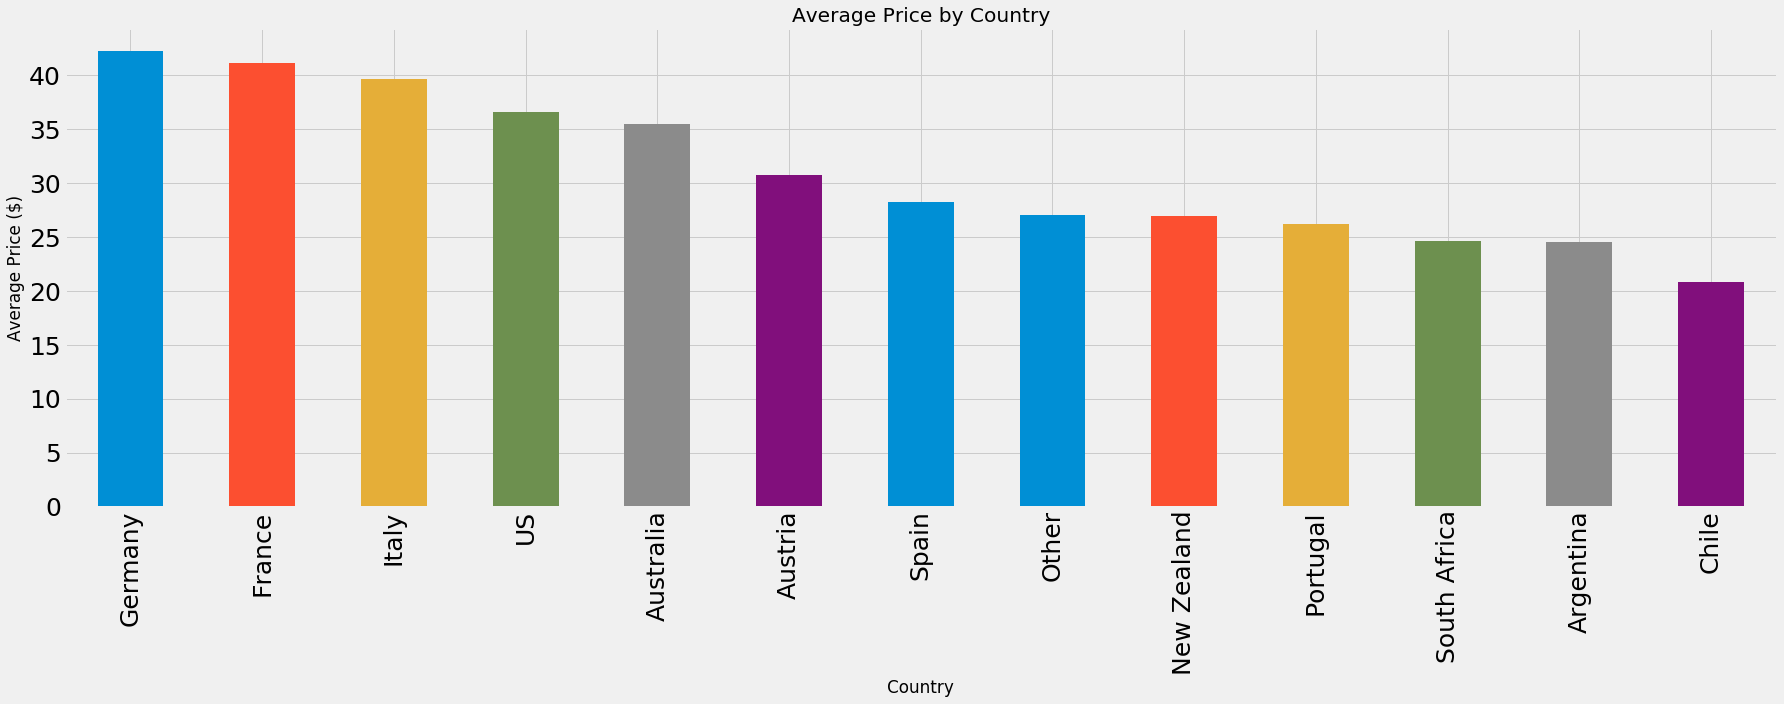

In [79]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar Chart based on Average Price per Country
wine_data_country_AvgPrice_df_sort = wine_data_country_df.sort_values(["Average Price"], ascending=False)
wine_data_country_AvgPrice_df_sort["Average Price"].plot(kind="bar", grid = True, fontsize = 25, figsize=(25,10))
plt.title("Average Price by Country")
plt.xlabel("Country")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("Output/AveragePriceperCountry.png")

plt.show()

In [80]:
# Creating table summary of Country data
wine_data_country_df_sort["Average Price"] = wine_data_country_df_sort["Average Price"].map("${:.0f}".format)
wine_data_country_df_sort["Highest Price"] = wine_data_country_df_sort["Highest Price"].map("${:.0f}".format)
wine_data_country_df_sort["Lowest Price"] = wine_data_country_df_sort["Lowest Price"].map("${:.0f}".format)
wine_data_country_df_sort["Wines per Winery"] = wine_data_country_df_sort["Wines per Winery"].map("{:.0f}".format)
wine_data_country_df_sort["# of Wines per Country"] = wine_data_country_df_sort["# of Wines per Country"].map("{:,}".format)
plt.savefig("Output/Countrytable.png")
wine_data_country_df_sort

,# of Wines per Country,# of Wineries per Country,Wines per Winery,# of Regions per Country,Average Price,Highest Price,Lowest Price
New Country,,,,,,,
US,"54,265",5368,10,27,$37,$2013,$4
France,"17,776",3400,5,11,$41,$3300,$5
Italy,"16,914",2629,6,10,$40,$900,$5
Spain,"6,573",1428,5,8,$28,$770,$4
Portugal,"4,875",382,13,40,$26,$1000,$5
Chile,"4,416",314,14,43,$21,$400,$5
Argentina,"3,756",528,7,2,$25,$230,$4
Austria,"2,799",211,13,25,$31,$1100,$7
Other,"2,516",502,5,178,$27,$764,$4


<Figure size 432x288 with 0 Axes>

In [81]:
wine_data_country_df_sort.to_excel("Output/CountryAnalysis.xlsx")

PermissionError: [Errno 13] Permission denied: 'Output/CountryAnalysis.xlsx'

Start calculating by region

In [82]:
# Bringing consolidating Dataframe
wine_data_df2 = wine_data_df   
wine_data_df2.head(5)

,Country,Region,Price_per_Bottle,Wineries,New Country
0,Portugal,Douro,15.0,Quinta dos Avidagos,Portugal
1,US,Oregon,14.0,Rainstorm,US
2,US,Michigan,13.0,St. Julian,US
3,US,Oregon,65.0,Sweet Cheeks,US
4,Spain,Northern Spain,15.0,Tandem,Spain


In [83]:
#Calculating new columns for Regions Data
Wine_region = wine_data_df2.groupby(["Region","New Country"])
Wine_region_count = Wine_region["Region"].count()
Wine_region_wineries_count = Wine_region["Wineries"].nunique()
Wine_region_mean = Wine_region["Price_per_Bottle"].mean()
Wine_region_max = Wine_region["Price_per_Bottle"].max()
Wine_region_min = Wine_region["Price_per_Bottle"].min()


In [84]:
# Building regions Dataframe
wine_region_df = pd.DataFrame({"# of Wines per Region" : Wine_region_count, "# of Wineries per Region" : Wine_region_wineries_count,
                               "Average Price" : Wine_region_mean,"Highest Price" : Wine_region_max,
                               "Lowest Price" : Wine_region_min, })
wine_region_df_sort = wine_region_df.sort_values(["# of Wines per Region"], ascending=False)
wine_region_df_sort.head(10)

,,# of Wines per Region,# of Wineries per Region,Average Price,Highest Price,Lowest Price
Region,New Country,,,,,
California,US,36104,3929,39.041048,2013.0,4.0
Washington,US,8583,654,32.436444,240.0,6.0
Oregon,US,5359,510,36.545064,275.0,5.0
Tuscany,Italy,5128,825,47.683697,900.0,6.0
Bordeaux,France,4002,1425,38.911794,3300.0,6.0
Northern Spain,Spain,3797,803,30.771925,600.0,5.0
Mendoza Province,Argentina,3226,453,25.053317,230.0,4.0
Burgundy,France,3106,332,71.058274,2500.0,9.0
Piedmont,Italy,3089,463,54.957268,595.0,7.0


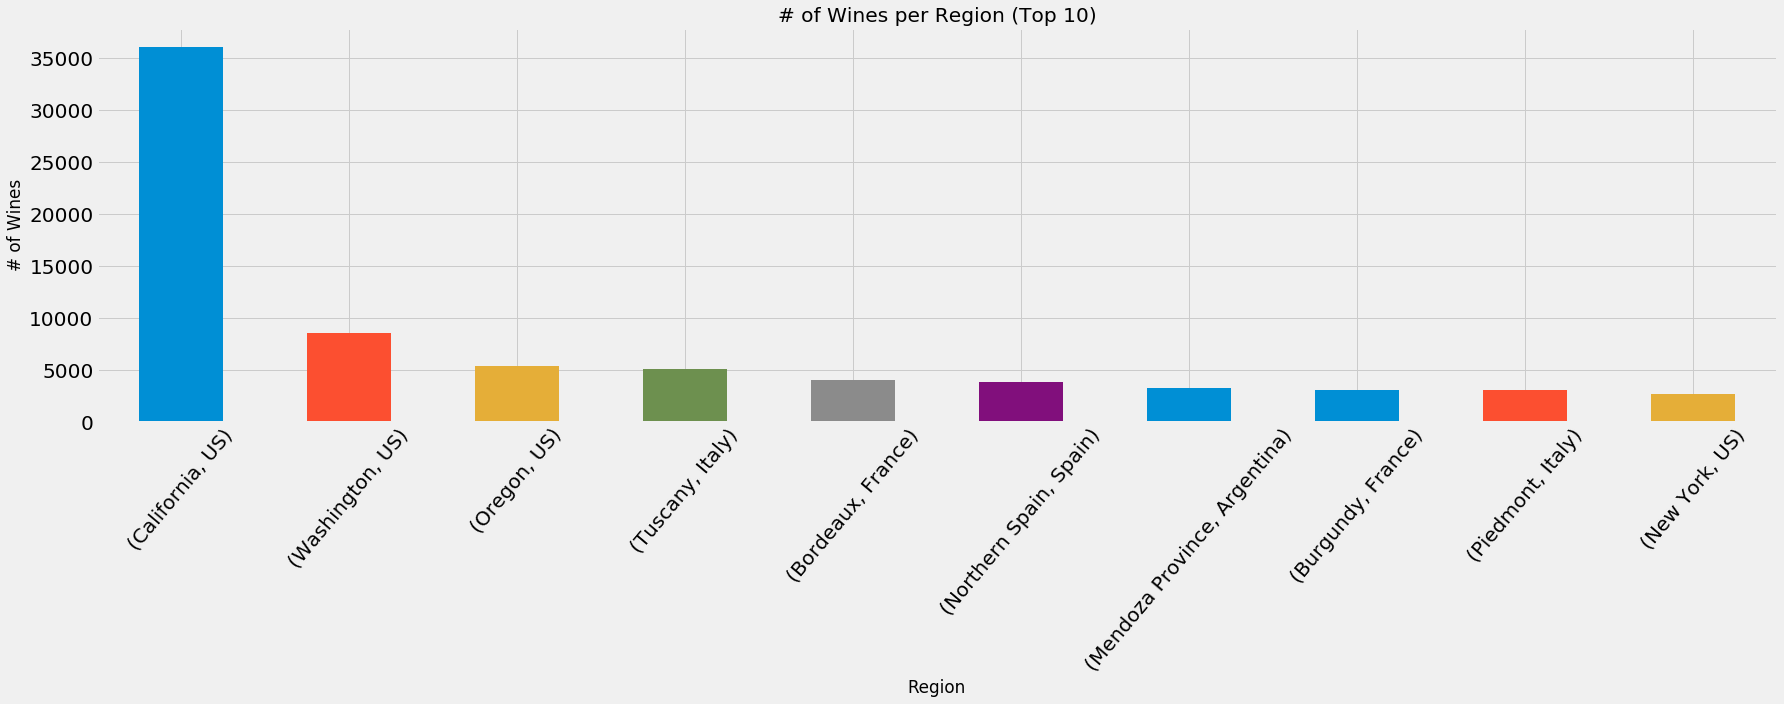

In [94]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar chart for # of wines per region
wine_region_df_sort["# of Wines per Region"].head(10).plot(kind="bar", fontsize = 20, figsize=(25,10))
plt.title("# of Wines per Region (Top 10)")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.ylabel("# of Wines")
plt.tight_layout()
plt.savefig("Output/#ofWinesperRegion.png")

plt.show()

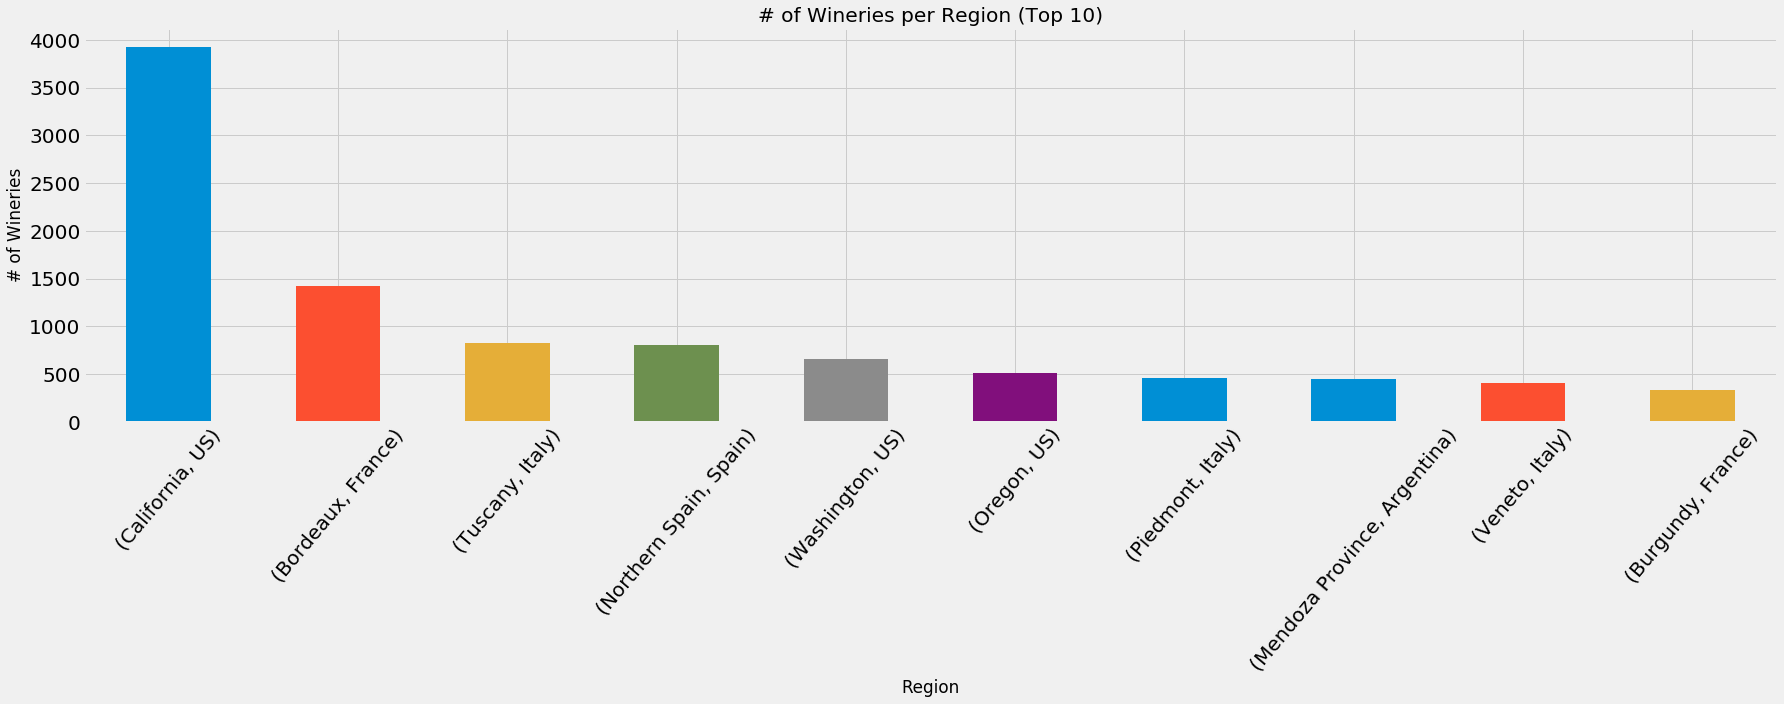

In [93]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar chart for # of wineries per region
wine_region_df_wineries_sort = wine_region_df.sort_values(["# of Wineries per Region"], ascending=False)
wine_region_df_wineries_sort["# of Wineries per Region"].head(10).plot(kind="bar",fontsize = 20, figsize=(25,10))
plt.title("# of Wineries per Region (Top 10)")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.ylabel("# of Wineries")
plt.tight_layout()
plt.savefig("Output/#ofWineriesperregion.png")
plt.show()

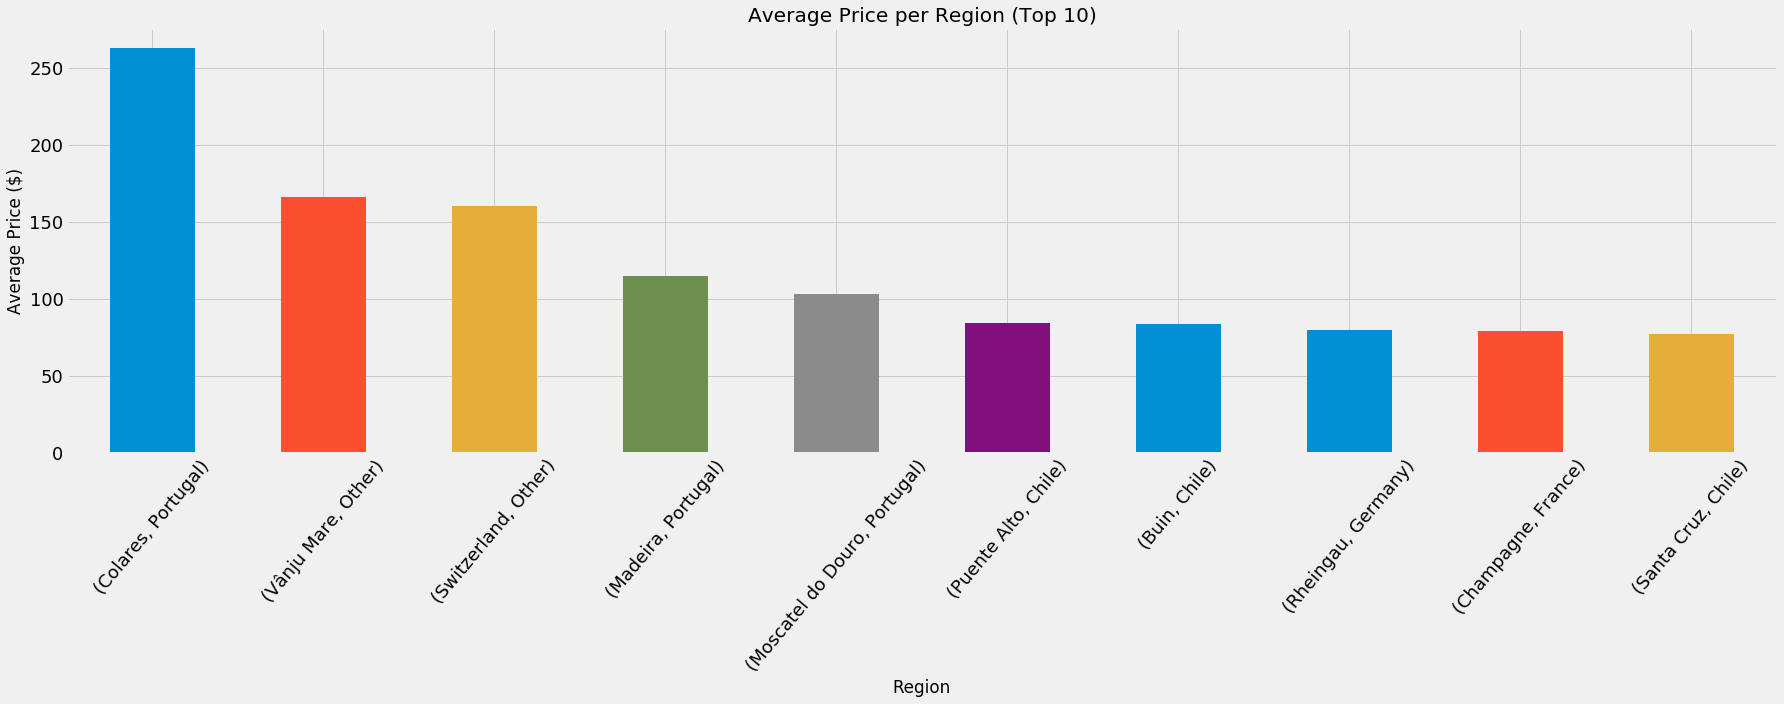

In [95]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar chart for Average Price per region
wine_region_df_AvgPrice_sort = wine_region_df.sort_values(["Average Price"], ascending=False)
wine_region_df_AvgPrice_sort["Average Price"].head(10).plot(kind="bar", fontsize = 18, figsize=(25,10))
plt.title("Average Price per Region (Top 10)")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("Output/topAveragePriceperRegion.png")
plt.show()

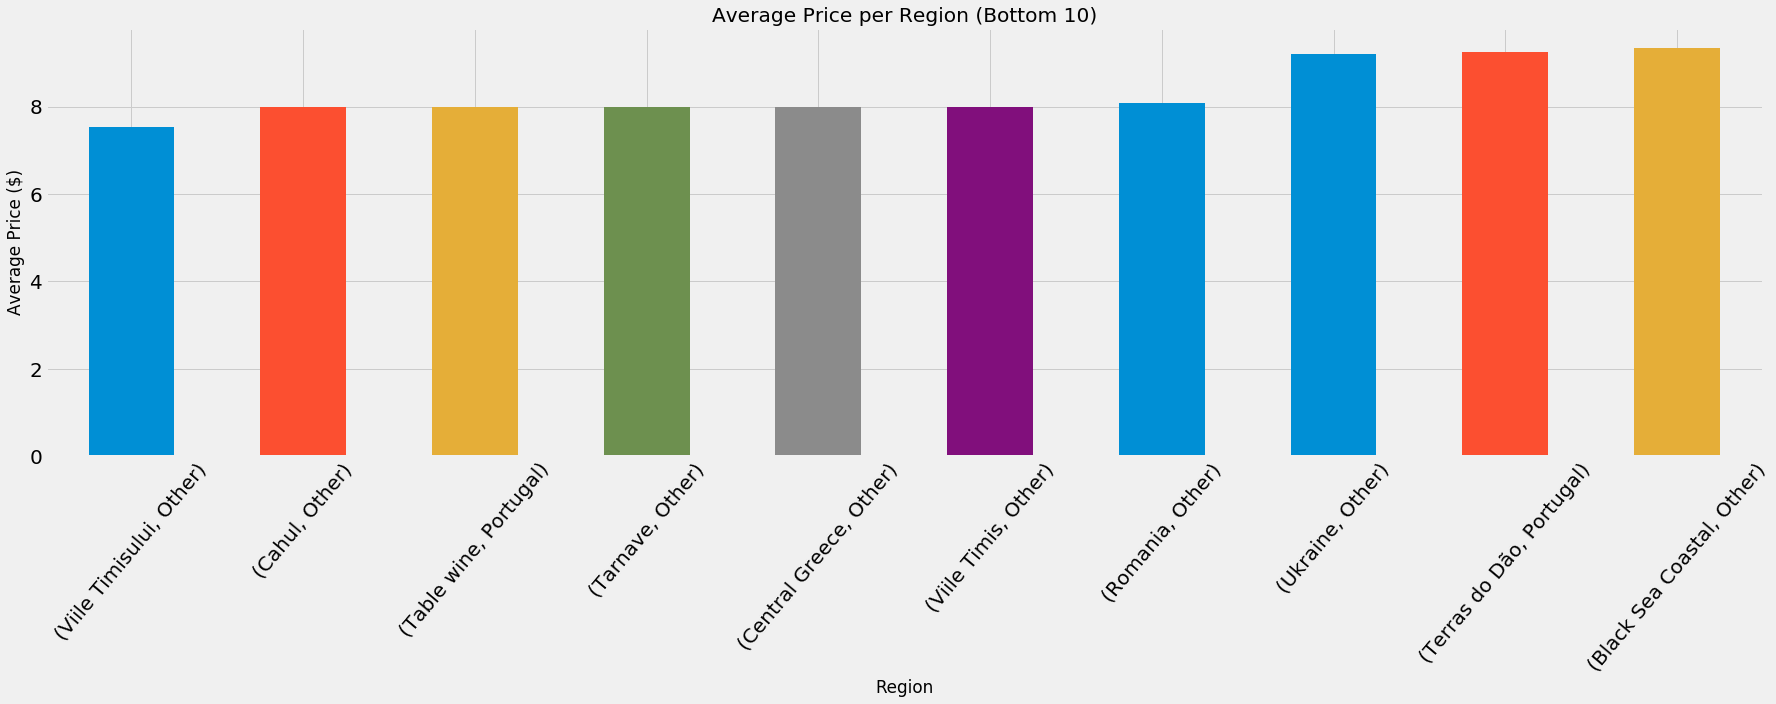

In [96]:
# Set plot style
plt.style.use('fivethirtyeight')

# Bar chart for Average Price per region
wine_region_df_AvgPrice_sort = wine_region_df.sort_values(["Average Price"], ascending=True)
wine_region_df_AvgPrice_sort["Average Price"].head(10).plot(kind="bar", fontsize = 20, figsize=(25,10))
plt.title("Average Price per Region (Bottom 10)")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("Output/bottomAveragePriceperRegion.png")
plt.show()

In [97]:
wine_region_df_sort["Average Price"] = wine_region_df_sort["Average Price"].map("${:.0f}".format)
wine_region_df_sort["Highest Price"] = wine_region_df_sort["Highest Price"].map("${:.0f}".format)
wine_region_df_sort["Lowest Price"] = wine_region_df_sort["Lowest Price"].map("${:.0f}".format)
wine_region_df_sort["# of Wineries per Region"] = wine_region_df_sort["# of Wineries per Region"].map("{:,}".format)
wine_region_df_sort["# of Wines per Region"] = wine_region_df_sort["# of Wines per Region"].map("{:,}".format)
plt.savefig("Output/Countrytable.png")
wine_region_df_sort.head(10)

,,# of Wines per Region,# of Wineries per Region,Average Price,Highest Price,Lowest Price
Region,New Country,,,,,
California,US,"36,104","3,929",$39,$2013,$4
Washington,US,"8,583",654,$32,$240,$6
Oregon,US,"5,359",510,$37,$275,$5
Tuscany,Italy,"5,128",825,$48,$900,$6
Bordeaux,France,"4,002","1,425",$39,$3300,$6
Northern Spain,Spain,"3,797",803,$31,$600,$5
Mendoza Province,Argentina,"3,226",453,$25,$230,$4
Burgundy,France,"3,106",332,$71,$2500,$9
Piedmont,Italy,"3,089",463,$55,$595,$7


<Figure size 432x288 with 0 Axes>

In [ ]:
wine_region_df_sort.to_excel("Output/RegionAnalysis.xlsx")